In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# Handling alerts seemingly as an error but not actually an errors.
import warnings 
warnings.filterwarnings("ignore")

# Handling the plotings so as to be in the NoteBook rather than in a separated windows.
%matplotlib inline 
plt.rcParams["figure.figsize"] = 8, 4 # the width 8 and height of 4 is the out put window.

In [138]:
# Twitter training and testing or validation data set definition
file_path_Train= "D:\Projects\DataScinece\PRODIGY_DS\Track_04\\twitter_training.csv"

# Reading Twitter training data using pandas 
Ttrain = pd.read_csv(file_path_Train,delimiter  = ",")
Ttrain.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [139]:
# Renaming the training data frame columns
Ttrain.columns = ["Id", "Entity", "Sentiment_Analysis", "Text_Info_Content"]
Ttrain.head()

,Id,Entity,Sentiment_Analysis,Text_Info_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [140]:
# Statistical description of the training data
Ttrain.describe

<bound method NDFrame.describe of          Id       Entity Sentiment_Analysis  \
0      2401  Borderlands           Positive   
1      2401  Borderlands           Positive   
2      2401  Borderlands           Positive   
3      2401  Borderlands           Positive   
4      2401  Borderlands           Positive   
...     ...          ...                ...   
74676  9200       Nvidia           Positive   
74677  9200       Nvidia           Positive   
74678  9200       Nvidia           Positive   
74679  9200       Nvidia           Positive   
74680  9200       Nvidia           Positive   

                                       Text_Info_Content  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                            

In [141]:
# Cheking for missing data values...
Ttrain.isnull().sum()

Id                      0
Entity                  0
Sentiment_Analysis      0
Text_Info_Content     686
dtype: int64

In [142]:
# Drop the row having missed value
Ttrain.dropna(axis=0 , inplace=True)

In [143]:
# Cheking for missing data...
Ttrain.isnull().sum()

Id                    0
Entity                0
Sentiment_Analysis    0
Text_Info_Content     0
dtype: int64

In [144]:
#Ccounting the occurrences of each unique value in the Sentiment_Analysis 
sentiment_counts = Ttrain['Sentiment_Analysis'].value_counts()
sentiment_counts

Sentiment_Analysis
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

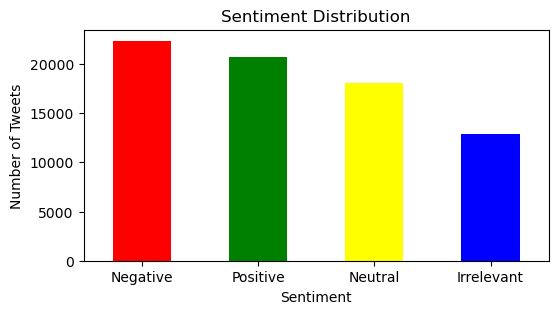

In [145]:
# Visualize Sentiment Distribution...
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [146]:
# Analyze Sentiment by Topic/Brand:
brand_data = Ttrain[Ttrain['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment_Analysis'].value_counts()
brand_sentiment_counts

Sentiment_Analysis
Neutral       825
Negative      764
Positive      602
Irrelevant    170
Name: count, dtype: int64

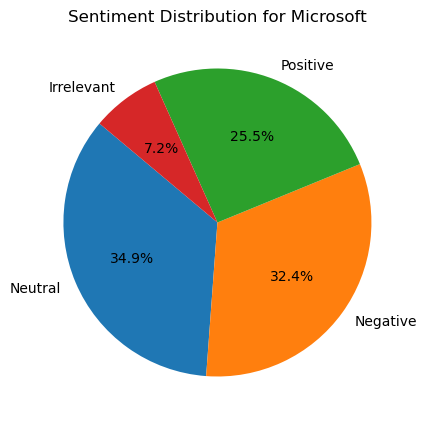

In [147]:
# Sentiment Distribution of a specified Entity
plt.figure(figsize=(5, 5))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()